### Domina Python: Visualización de datos con Matplotlib y Seaborn
#### Gráfico de líneas con Matplotlib

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import yfinance as yf
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec

In [4]:
locale.setlocale(locale.LC_TIME, "es_ES") 

'es_ES'

In [5]:
data = pd.read_excel('FAC_Febrero2024.xlsx', engine='openpyxl')
data.head()

,Sector,Comprobante,Tipo_Comprobante,Numero_Comprobante,Nombre,Sector_OR,Tipo_Documento,Numero_Documento,Neto_Gravado,Exento,...,Fecha,IdOR,IdVale,MO_s_Iva,MO3_s_Iva,Descuento,REP_s_Iva,REP_Costo_s_Iva,Usuario.1,Unidad_Negocio
0,REPUESTOS,FACTURA,A,0030-00010742,ADASA ACCESORIOS DEL AUTOMOTOR SACIF,Mayorista,CUIT,30542219560,9.719741e+05,0,...,15/02/2024 02:24:00 p.m.,49365,0,0.0000,0.0,-199079.0321,1171053.13,878289.85,Jonatan Ezequiel Monsalvo,Repuestos
1,REPUESTOS,FACTURA,A,0030-00010801,AUTO REPARACIONES NORTE SA,Mayorista,CUIT,30710149085,1.914736e+06,0,...,29/02/2024 02:10:00 p.m.,49292,0,0.0000,0.0,-392174.8700,2306911.00,1730183.25,Jonatan Ezequiel Monsalvo,Repuestos
2,REPUESTOS,FACTURA,A,0030-00010780,DAJA SERVICIOS S.R.L.,Mayorista,CUIT,30711904553,6.595041e+05,0,...,23/02/2024 03:28:00 p.m.,49488,0,63312.5761,0.0,0.0000,596191.55,436843.41,Jonatan Ezequiel Monsalvo,Repuestos
3,REPUESTOS,FACTURA,A,0030-00010799,DAJA SERVICIOS S.R.L.,Mayorista,CUIT,30711904553,1.162810e+06,0,...,29/02/2024 01:47:00 p.m.,49571,0,0.0000,0.0,-95666.5083,1258476.43,910239.58,Jonatan Ezequiel Monsalvo,Repuestos
4,REPUESTOS,FACTURA,A,0030-00010726,FECHINO JOSE LUIS Y PUYOL EDUARDO ESTEBAN S.H.,Mayorista,CUIT,30710615825,2.563914e+06,0,...,09/02/2024 04:04:00 p.m.,49323,0,0.0000,0.0,-519304.4008,3083218.22,2250387.19,Jonatan Ezequiel Monsalvo,Repuestos


In [10]:
data['Mes'] = pd.to_datetime(data['Fecha'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Sector              233 non-null    object        
 1   Comprobante         233 non-null    object        
 2   Tipo_Comprobante    233 non-null    object        
 3   Numero_Comprobante  233 non-null    object        
 4   Nombre              233 non-null    object        
 5   Sector_OR           233 non-null    object        
 6   Tipo_Documento      233 non-null    object        
 7   Numero_Documento    233 non-null    int64         
 8   Neto_Gravado        233 non-null    float64       
 9   Exento              233 non-null    int64         
 10  Iva                 233 non-null    float64       
 11  Iva_Utilitario      233 non-null    int64         
 12  Total               233 non-null    float64       
 13  Usuario             233 non-null    object        

C:\Users\operez\AppData\Local\Temp\ipykernel_28436\3353408063.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Mes'] = pd.to_datetime(data['Fecha'])


In [11]:
data.columns

Index(['Sector', 'Comprobante', 'Tipo_Comprobante', 'Numero_Comprobante',
       'Nombre', 'Sector_OR', 'Tipo_Documento', 'Numero_Documento',
       'Neto_Gravado', 'Exento', 'Iva', 'Iva_Utilitario', 'Total ', 'Usuario',
       'Fecha', 'IdOR', 'IdVale', 'MO_s_Iva', 'MO3_s_Iva', 'Descuento',
       'REP_s_Iva', 'REP_Costo_s_Iva', 'Usuario.1', 'Unidad_Negocio', 'Mes'],
      dtype='object')

In [12]:
data.isnull().sum()

Sector                0
Comprobante           0
Tipo_Comprobante      0
Numero_Comprobante    0
Nombre                0
Sector_OR             0
Tipo_Documento        0
Numero_Documento      0
Neto_Gravado          0
Exento                0
Iva                   0
Iva_Utilitario        0
Total                 0
Usuario               0
Fecha                 0
IdOR                  0
IdVale                0
MO_s_Iva              0
MO3_s_Iva             0
Descuento             0
REP_s_Iva             0
REP_Costo_s_Iva       0
Usuario.1             0
Unidad_Negocio        0
Mes                   0
dtype: int64

In [16]:
# Forzar a string
data["Fecha_limpia"] = data["Fecha"].astype(str)

# Reemplazar sufijos en español
data["Fecha_limpia"] = (
    data["Fecha_limpia"]
    .str.replace("a.m.", "AM", regex=False)
    .str.replace("p.m.", "PM", regex=False)
)

In [17]:
# Convertir a datetime
data["Fecha_limpia"] = pd.to_datetime(
    data["Fecha_limpia"], 
    format="%d/%m/%Y %I:%M:%S %p", 
    errors="coerce"
)

In [30]:
# Extraer solo la fecha
data["Fecha_sola"] = data["Fecha_limpia"].dt.date

# Extraer solo la hora
data["Hora_sola"] = data["Fecha_limpia"].dt.time

# Año, mes y día por separado
data["Año"] = data["Fecha_limpia"].dt.year
data["Mes"] = data["Fecha_limpia"].dt.strftime("%B")
data["Día"] = data["Fecha_limpia"].dt.day



In [31]:
data.head()

,Sector,Comprobante,Tipo_Comprobante,Numero_Comprobante,Nombre,Sector_OR,Tipo_Documento,Numero_Documento,Neto_Gravado,Exento,...,REP_s_Iva,REP_Costo_s_Iva,Usuario.1,Unidad_Negocio,Mes,Fecha_limpia,Fecha_sola,Hora_sola,Año,Día
0,REPUESTOS,FACTURA,A,0030-00010742,ADASA ACCESORIOS DEL AUTOMOTOR SACIF,Mayorista,CUIT,30542219560,9.719741e+05,0,...,1171053.13,878289.85,Jonatan Ezequiel Monsalvo,Repuestos,febrero,2024-02-15 14:24:00,2024-02-15,14:24:00,2024,15
1,REPUESTOS,FACTURA,A,0030-00010801,AUTO REPARACIONES NORTE SA,Mayorista,CUIT,30710149085,1.914736e+06,0,...,2306911.00,1730183.25,Jonatan Ezequiel Monsalvo,Repuestos,febrero,2024-02-29 14:10:00,2024-02-29,14:10:00,2024,29
2,REPUESTOS,FACTURA,A,0030-00010780,DAJA SERVICIOS S.R.L.,Mayorista,CUIT,30711904553,6.595041e+05,0,...,596191.55,436843.41,Jonatan Ezequiel Monsalvo,Repuestos,febrero,2024-02-23 15:28:00,2024-02-23,15:28:00,2024,23
3,REPUESTOS,FACTURA,A,0030-00010799,DAJA SERVICIOS S.R.L.,Mayorista,CUIT,30711904553,1.162810e+06,0,...,1258476.43,910239.58,Jonatan Ezequiel Monsalvo,Repuestos,febrero,2024-02-29 13:47:00,2024-02-29,13:47:00,2024,29
4,REPUESTOS,FACTURA,A,0030-00010726,FECHINO JOSE LUIS Y PUYOL EDUARDO ESTEBAN S.H.,Mayorista,CUIT,30710615825,2.563914e+06,0,...,3083218.22,2250387.19,Jonatan Ezequiel Monsalvo,Repuestos,febrero,2024-02-09 16:04:00,2024-02-09,16:04:00,2024,9


In [24]:
categoria = (data.groupby('Sector_OR')[['REP_s_Iva','REP_Costo_s_Iva']].sum()
             .sort_values(by='REP_s_Iva', ascending=True))

print(categoria.head())


                 REP_s_Iva  REP_Costo_s_Iva
Sector_OR                                  
Mercado Libre    427035.96        246366.90
Venta 0KM        730136.52        421232.61
Mayorista      25955284.03      19806784.61
Mostrador      31244714.80      18246092.72
Taller         40108172.60      23617815.56


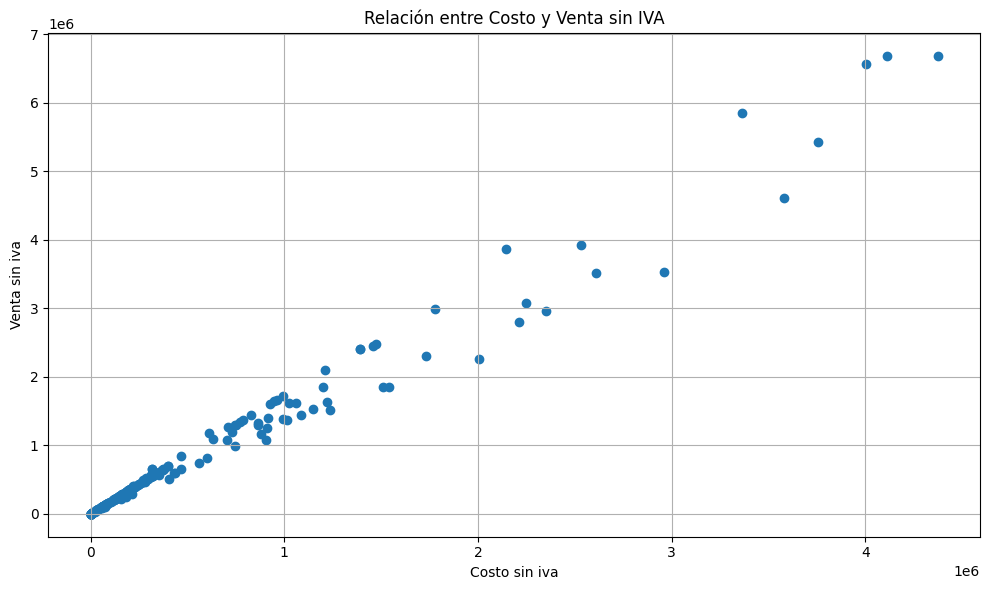

In [25]:
plt.figure(figsize=(10,6))

plt.scatter(data['REP_Costo_s_Iva'], data['REP_s_Iva'])
plt.xlabel('Costo sin iva')
plt.ylabel('Venta sin iva')
plt.title('Relación entre Costo y Venta sin IVA')
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
np.corrcoef(data['REP_Costo_s_Iva'], data['REP_s_Iva'])

array([[1.        , 0.98930628],
       [0.98930628, 1.        ]])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Sector              233 non-null    object        
 1   Comprobante         233 non-null    object        
 2   Tipo_Comprobante    233 non-null    object        
 3   Numero_Comprobante  233 non-null    object        
 4   Nombre              233 non-null    object        
 5   Sector_OR           233 non-null    object        
 6   Tipo_Documento      233 non-null    object        
 7   Numero_Documento    233 non-null    int64         
 8   Neto_Gravado        233 non-null    float64       
 9   Exento              233 non-null    int64         
 10  Iva                 233 non-null    float64       
 11  Iva_Utilitario      233 non-null    int64         
 12  Total               233 non-null    float64       
 13  Usuario             233 non-null    object        

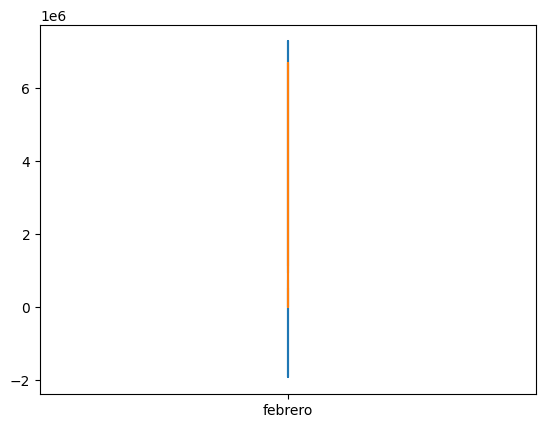

In [33]:
### Gráfico de lineas

fig, ax = plt.subplots()
ax.plot(data['Mes'], data['Neto_Gravado'])
ax.plot(data['Mes'], data['REP_s_Iva'])
plt.show()

In [128]:
df_ventas = pd.DataFrame({
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio','Julio'],
    'Ventas': [1500, 1800, 1700, 1600, 2000, 2100, 2200],
    'Gastos': [800, 900, 850, 870, 950, 1000, 1200]  
})

df_ventas['Ganancia'] = df_ventas['Ventas']-df_ventas['Gastos']

df_ventas.head(10)

,Mes,Ventas,Gastos,Ganancia
0,Enero,1500,800,700
1,Febrero,1800,900,900
2,Marzo,1700,850,850
3,Abril,1600,870,730
4,Mayo,2000,950,1050
5,Junio,2100,1000,1100
6,Julio,2200,1200,1000


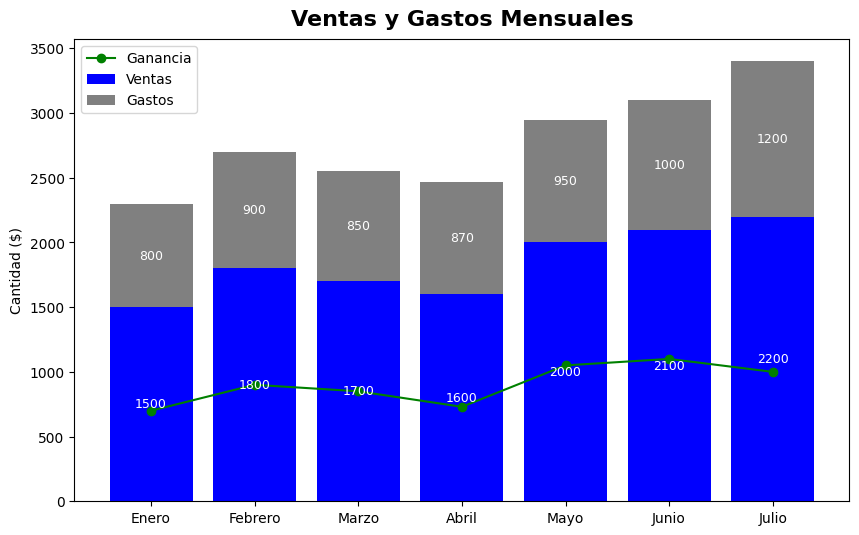

In [131]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(df_ventas['Mes'], df_ventas['Ventas'], label='Ventas', color='blue')
ax.bar(df_ventas['Mes'], df_ventas['Gastos'], bottom=df_ventas['Ventas'], label='Gastos', color='gray')
ax.plot(df_ventas['Mes'], df_ventas['Ganancia'], label='Ganancia', color='green', marker='o')

# --- Agregar etiquetas ---
for i, (ventas, gastos) in enumerate(zip(df_ventas['Ventas'], df_ventas['Gastos'])):
    # Etiqueta dentro de ventas
    ax.text(i, ventas/2, str(ventas), ha='center', va='center', color='white', fontsize=9)
    # Etiqueta dentro de gastos (arriba de ventas)
    ax.text(i, ventas + gastos/2, str(gastos), ha='center', va='center', color='white', fontsize=9)

ax.set_ylabel('Cantidad ($)')
plt.title('Ventas y Gastos Mensuales', fontsize=16, color='black', fontweight='bold', pad=10, ha='center')
plt.legend()
plt.show()

###  Visualización de datos Avanzada con Matplotlib y Seaborn

####  Visualización de datos Avanzada con Matplotlib y Seaborn

c:\Users\epere\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\epere\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\epere\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\epere\AppData\Local\Programs\Python\Python313\

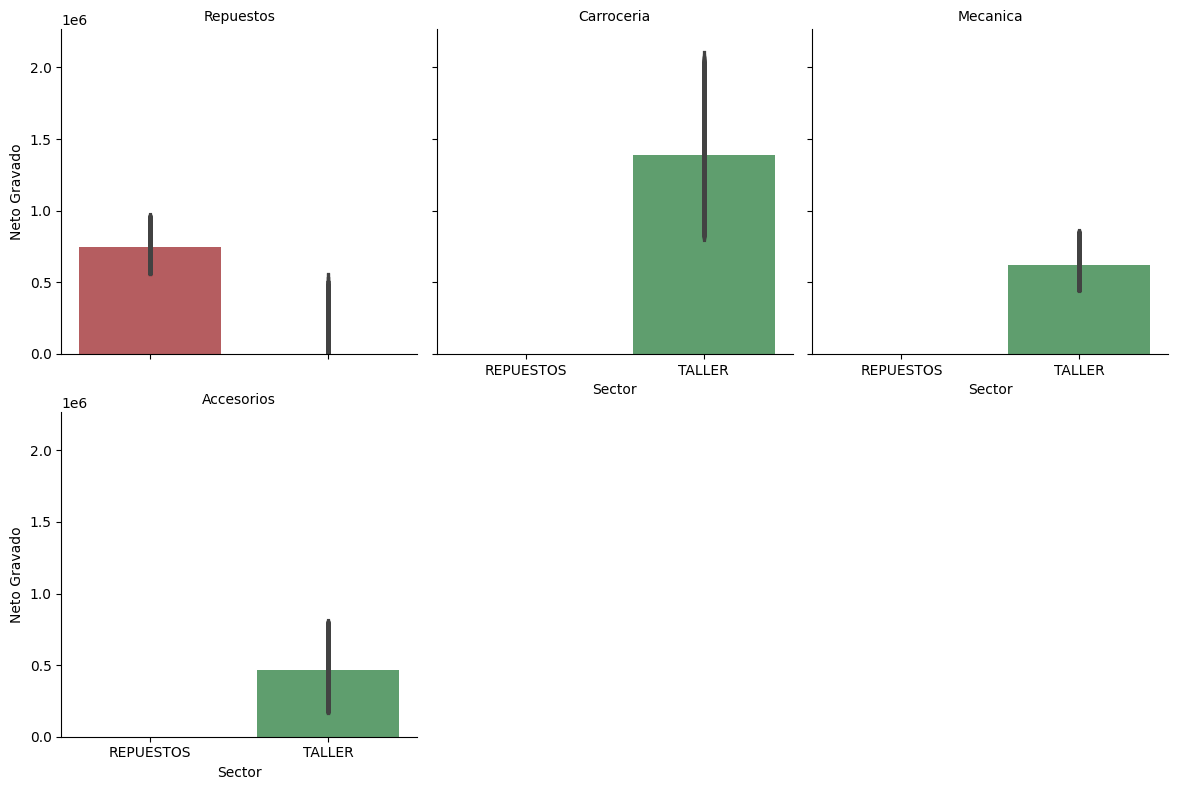

In [16]:
g = sns.FacetGrid(data, col="Unidad_Negocio", col_wrap=3, height=4)
g.map(sns.barplot, "Sector", "Neto_Gravado", order=data["Sector"], palette="deep")
g.set_titles(col_template="{col_name}")
g.set(ylim=(0, None))
g.set(xticks=range(len(data["Sector"].unique())), xticklabels=data["Sector"].unique())
g.set_axis_labels("Sector", "Neto Gravado")
plt.show()

####  Visualización de datos Avanzada con Matplotlib y Seaborn

C:\Users\epere\AppData\Local\Temp\ipykernel_28340\2705881481.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="repuestos", y="ventas", data=df_ventas_2, palette="deep")


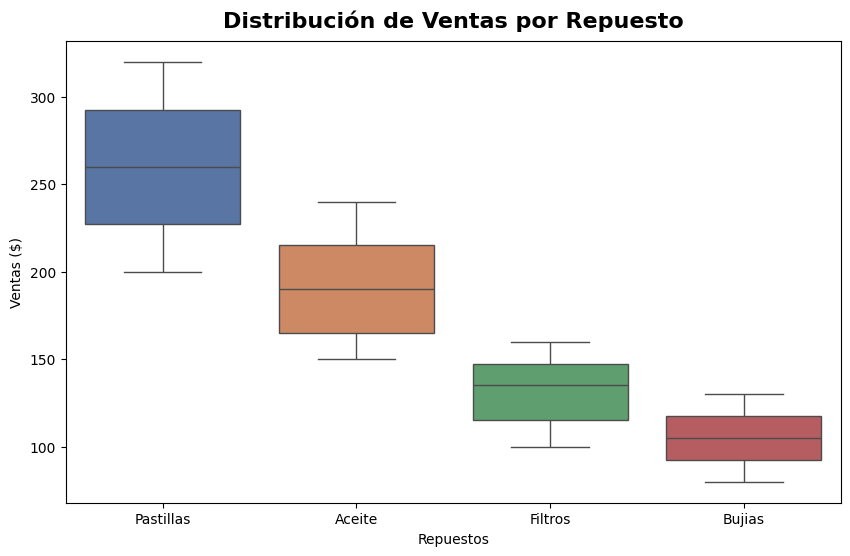

In [19]:
df_ventas_2 = pd.DataFrame({
    "repuestos": ["Pastillas", "Aceite", "Filtros", "Bujias"] * 6,
    "ventas": [200, 150, 100, 80, 220, 160, 110, 90, 250, 180, 130, 100, 270, 200, 140, 110, 300, 220, 150, 120, 320, 240, 160, 130],
})

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x="repuestos", y="ventas", data=df_ventas_2, palette="deep")
ax.set_xlabel("Repuestos")
ax.set_ylabel("Ventas ($)")
ax.set_title("Distribución de Ventas por Repuesto", fontsize=16, color='black', fontweight='bold', pad=10)
plt.show()

####  Diagrama de violín con Seaborn

C:\Users\epere\AppData\Local\Temp\ipykernel_28340\2234092808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="repuestos", y="ventas", data=df_ventas_2, palette="muted", inner="quartile", ax=ax)


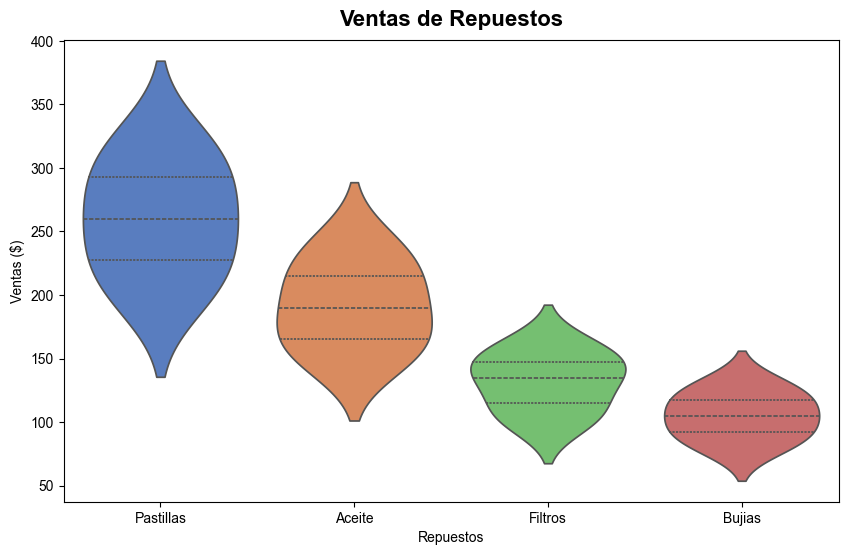

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.violinplot(x="repuestos", y="ventas", data=df_ventas_2, palette="muted", inner="quartile", ax=ax)
ax.set_xlabel("Repuestos")
ax.set_ylabel("Ventas ($)")
ax.set_title("Ventas de Repuestos", fontsize=16, color='black', fontweight='bold', pad=10)
plt.show()

### Prácticas con Librerias de Finanzas

In [6]:
start_date = '2025-01-01'
end_date = '2025-09-19'

df = yf.download('INTC', start=start_date, end=end_date)

df.head()

C:\Users\epere\AppData\Local\Temp\ipykernel_6912\2163736083.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('INTC', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,INTC,INTC,INTC,INTC,INTC
Date,,,,,
2025-01-02,20.219999,20.430000,20.000000,20.230000,46438500
2025-01-03,20.559999,20.670000,20.059999,20.389999,48983900
2025-01-06,19.870001,20.980000,19.780001,20.830000,83271000
2025-01-07,20.010000,20.340000,19.900000,20.020000,61726100
2025-01-08,19.879999,20.120001,19.709999,19.830000,47897100


In [3]:
# Obtener información de la acción de Intel

ticke = 'INTC'

intel_info = yf.Ticker(ticker=ticke)
info = intel_info.info
evolution = intel_info.history(period='1y')
nombre_empresa = info.get("longName", ticke) 

df = evolution
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-20 00:00:00-04:00,20.889999,23.139999,20.350000,21.840000,260377900,0.0,0.0
2024-09-23 00:00:00-04:00,22.430000,22.820000,22.030001,22.559999,184439100,0.0,0.0
2024-09-24 00:00:00-04:00,22.530001,23.110001,22.290001,22.809999,113082500,0.0,0.0
2024-09-25 00:00:00-04:00,22.799999,24.059999,22.730000,23.540001,117013400,0.0,0.0
2024-09-26 00:00:00-04:00,24.280001,24.420000,23.250000,23.920000,95416900,0.0,0.0
...,...,...,...,...,...,...,...
2025-09-15 00:00:00-04:00,24.330000,25.459999,24.219999,24.770000,83951600,0.0,0.0
2025-09-16 00:00:00-04:00,24.820000,25.340000,24.690001,25.270000,60336600,0.0,0.0
2025-09-17 00:00:00-04:00,25.080000,25.260000,24.450001,24.900000,63093700,0.0,0.0


In [4]:

# Cálculo del RSI
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = compute_rsi(df)
df['RSI'] = df['RSI'].fillna(method='bfill')  # o 'ffill'

# Cálculo del MACD
ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()
macd = ema12 - ema26
signal = macd.ewm(span=9, adjust=False).mean()
histograma = macd - signal


df.head(200)

C:\Users\epere\AppData\Local\Temp\ipykernel_16984\539699924.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['RSI'] = df['RSI'].fillna(method='bfill')  # o 'ffill'


,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI
Date,,,,,,,,
2024-09-20 00:00:00-04:00,20.889999,23.139999,20.350000,21.840000,260377900,0.0,0.0,62.321420
2024-09-23 00:00:00-04:00,22.430000,22.820000,22.030001,22.559999,184439100,0.0,0.0,62.321420
2024-09-24 00:00:00-04:00,22.530001,23.110001,22.290001,22.809999,113082500,0.0,0.0,62.321420
2024-09-25 00:00:00-04:00,22.799999,24.059999,22.730000,23.540001,117013400,0.0,0.0,62.321420
2024-09-26 00:00:00-04:00,24.280001,24.420000,23.250000,23.920000,95416900,0.0,0.0,62.321420
...,...,...,...,...,...,...,...,...
2025-07-03 00:00:00-04:00,22.150000,22.629999,21.990000,22.490000,61176000,0.0,0.0,62.250703
2025-07-07 00:00:00-04:00,22.209999,22.389999,21.860001,22.000000,80725200,0.0,0.0,63.517444
2025-07-08 00:00:00-04:00,22.180000,23.790001,22.129999,23.590000,119545500,0.0,0.0,68.106735


In [5]:
# Colores más suaves
soft_green = '#66bb6a'
soft_red = '#ef5350'

bar_colors = [soft_green if h >= 0 else soft_red for h in histograma]

C:\Users\epere\AppData\Local\Temp\ipykernel_16984\1510521087.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


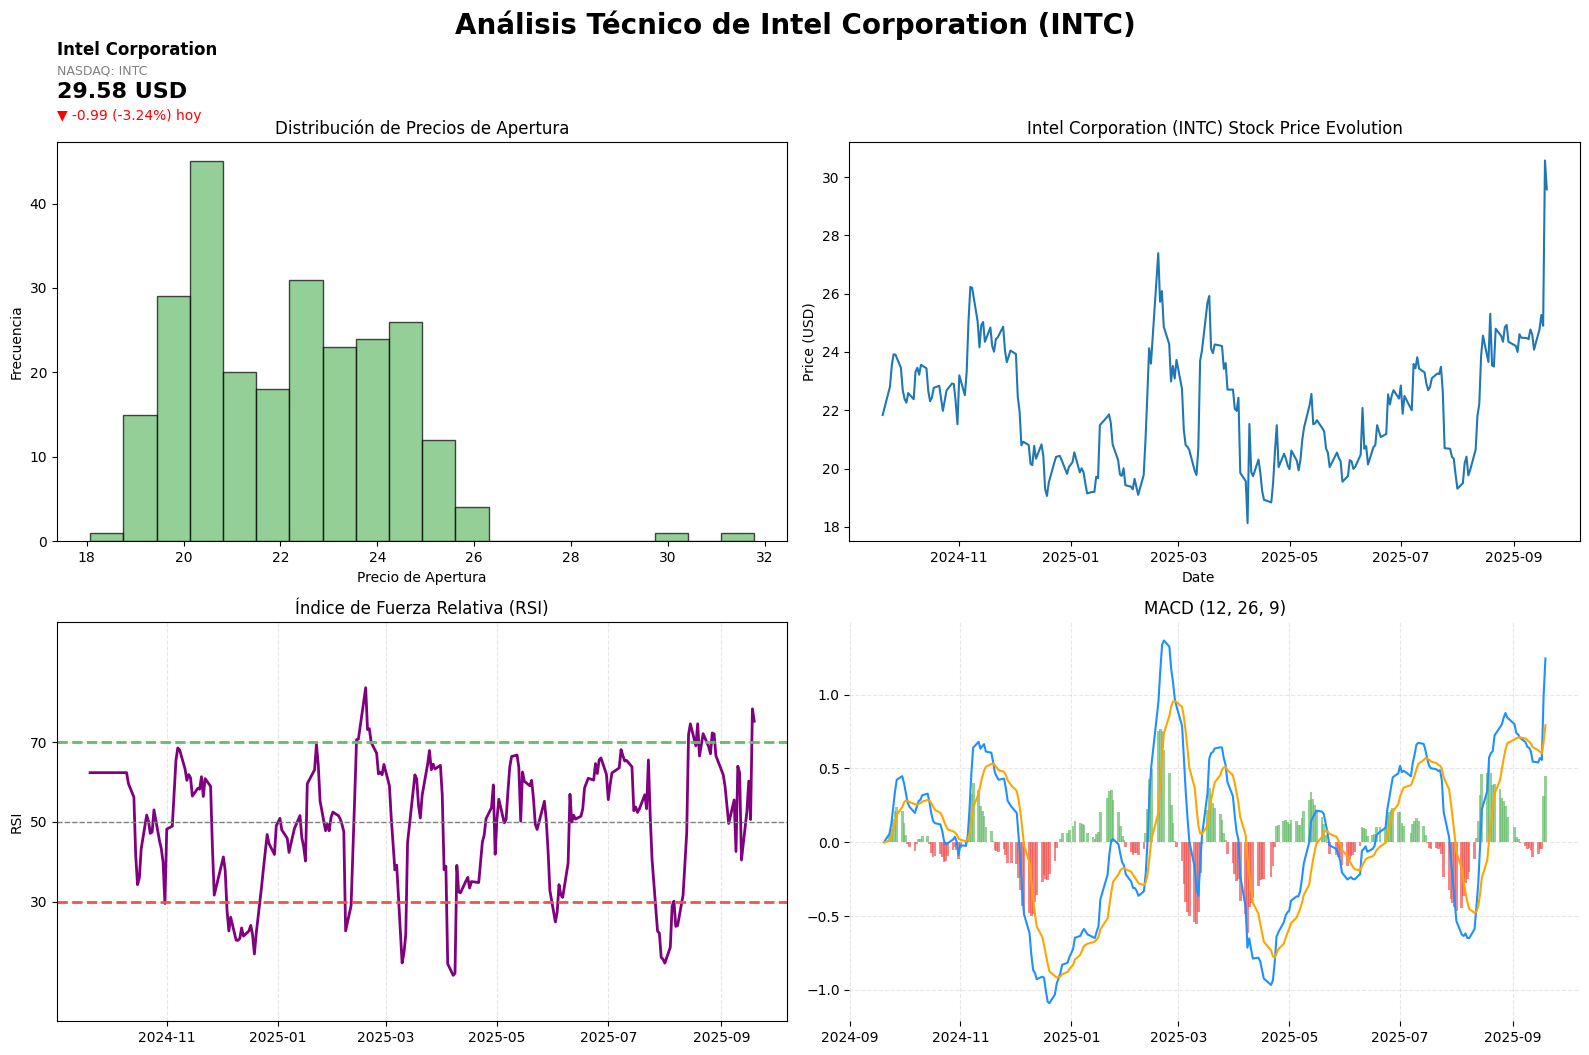

In [6]:
plt.style.use("default")
fig, ax = plt.subplots(2,2, figsize=(16,10))
gs = gridspec.GridSpec(3, 2, height_ratios=[1,3,3], hspace=0.4)
fig.suptitle(f'Análisis Técnico de {nombre_empresa} ({ticke})', fontsize=20, fontweight='bold', y=1.05)

###Tarjeta con información de la empresa###
card_ax = fig.add_axes([0.01, 0.92, 0.95, 0.1])
card_ax.axis('off')

rect = patches.FancyBboxPatch((0,0),1,1, boxstyle="round,pad=0.05", linewidth=1.2, edgecolor="lightgray", facecolor="none")
card_ax.add_patch(rect)

precio_actual = df['Close'].iloc[-1]
precio_anterior = df['Close'].iloc[-2]
cambio = precio_actual - precio_anterior
cambio_pct = (cambio / precio_anterior) * 100 if precio_anterior != 0 else 0
color = "green" if cambio > 0 else "red" 
simbolo = "▲" if cambio > 0 else "▼"

card_ax.text(0.03, 0.85, nombre_empresa, fontsize=12, fontweight="bold", ha="left")
card_ax.text(0.03, 0.65, f"NASDAQ: {ticke}", fontsize=9, color="gray", ha="left")
card_ax.text(0.03, 0.42, f"{precio_actual:.2f} USD", fontsize=16, fontweight="bold", ha="left")
card_ax.text(0.03, 0.20, f"{simbolo} {cambio:.2f} ({cambio_pct:.2f}%) hoy",
             fontsize=10, color=color, ha="left")

ax[0,0].hist(df['Open'], bins=20, color=soft_green, edgecolor='black', alpha=0.7)
ax[0,0].set_xlabel('Precio de Apertura')
ax[0,0].set_ylabel('Frecuencia')
ax[0,0].set_title('Distribución de Precios de Apertura')

###Evolución del precio de cierre a lo largo del tiempo###
ax[0,1].plot(df.index, df['Close'], label='INTC Close Price')
ax[0,1].set_xlabel('Date', ha='right', fontsize=10)
ax[0,1].set_ylabel('Price (USD)')
ax[0,1].set_title(f'{nombre_empresa} ({ticke}) Stock Price Evolution')

###RSI a lo largo del tiempo###
ax[1,0].plot(df.index, df['RSI'], color='purple', linewidth=2, label='RSI (14)')
ax[1,0].axhline(70, color=soft_green, linestyle='--', linewidth=2)
ax[1,0].axhline(50, color='grey', linestyle='--', linewidth=1)
ax[1,0].axhline(30, color=soft_red, linestyle='--', linewidth=2)
ax[1,0].set_ylabel('RSI')
ax[1,0].set_title('Índice de Fuerza Relativa (RSI)', fontsize=12)
ax[1,0].set_yticks([30, 50, 70])
ax[1,0].set_ylim(0, 100)
ax[1,0].grid(True, linestyle='--', alpha=0.3)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax[1,1].bar(df.index, histograma, color=bar_colors, width=1.5, alpha=0.7, label='Histograma', edgecolor='none')
ax[1,1].plot(df.index, macd, color='dodgerblue', linewidth=1.5, label='MACD')
ax[1,1].plot(df.index, signal, color='orange', linewidth=1.5, label='Señal')
ax[1,1].grid(True, linestyle='--', alpha=0.3)
ax[1,1].set_title('MACD (12, 26, 9)', fontsize=12)
for spine in ax[1,1].spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()



